<h1 style="text-align: center;">DAV 6150 Module 7 Assignment</h1>
<h2 style="text-align: center;">Logistic Regression</h2>


#### Group 3 Contributors:


| Alluri Ratna Anvesh  | Ashish Rogannagari   |
|-------------------------|-------------------------|
| **Deepak Guda Reddy**    | **Nikki Rastogi**        |


### Structured Approach for Logistic Regression Model Development:


1. **Introduction and Dataset Overview**  
   The dataset contains over 14,000 customer records aimed at predicting whether a customer will purchase an additional insurance product. Key features include customer demographics, loyalty, and financial data. The objective is to build a logistic regression model for improving cross-selling strategies.

2. **Data Loading**  
   Load the `M7_Data.csv` file from the GitHub repository into a Pandas DataFrame in Jupyter Notebook to begin analysis.

3. **Exploratory Data Analysis (EDA)**  
   Perform EDA to check for missing values, understand distributions, and visualize relationships between variables to identify patterns that will inform data preparation.

4. **Data Preparation**  
   Handle missing values, normalize numerical features, and ensure the dataset is clean and ready for modeling. Verify all preprocessing steps have been applied correctly.

5. **Prepped Data Review**  
   Recheck the cleaned dataset to confirm it is ready for regression modeling, ensuring that all necessary transformations are complete.

6. **Logistic Regression Modeling**  
   Split the dataset into training and testing sets. Build and train multiple logistic regression models using different feature combinations and evaluate their performance.

7. **Model Selection**  
   Compare models using accuracy, precision, recall, and F1-score. Select the best model based on its performance and simplicity, then apply it to the test data for final evaluation.

8. **Conclusion**  
   Summarize key findings, model performance, and provide actionable recommendations for using the model to enhance cross-selling strategies for the insurance company.

### Step 1: Introduction and Dataset Overview

#### 1.1 Introduction:

In the highly competitive insurance industry, companies are always striving to improve customer retention and increase their revenue streams by cross-selling products to existing customers. For instance, if a customer has purchased home insurance, the company may try to sell auto insurance or a supplemental policy to cover additional risks. This process of upselling and cross-selling is a key factor in maximizing the lifetime value of a customer.

The goal of this project is to develop a predictive model that can help an insurance company determine whether an existing customer is likely to purchase an additional insurance product. The company can use this model to enhance its sales strategies and improve customer retention by targeting the right customers with personalized offers.

To achieve this, we will use logistic regression, a widely used classification technique, to model the likelihood of a customer purchasing an additional product based on various customer attributes and buying behaviors.


#### 1.2 Dataset Overview :

| **Description** | **Details** |
|-----------------|-------------|
| **Source**      | [Dataset (kaggle Contribution)](https://www.kaggle.com/rluyck/insurance-company?select=Customer_data.csv) |
| **Observations**| 14,000+ customer records |
| **Target Variable** | TARGET (Binary: 0 = No, 1 = Yes) |
| **Explanatory Variables** | 14 variables representing demographics, loyalty, and past product purchases |
| **Objective**   | Predict whether a customer will purchase the new insurance product |

#### 1.3 Feature Descriptions :

| **Feature Name**  | **Description** |
|-------------------|-----------------|
| **ID**            | Unique customer identifier (not used for prediction) |
| **TARGET**        | Indicates whether the customer purchased the new insurance product (Y = Yes, N = No) |
| **Loyalty**       | Customer loyalty level (1 = low, 2 = medium, 3 = high, 99 = unclassified) |
| **Age**           | Customer’s age (in years, ranging from 5 to 102, with most values between 10 and 94) |
| **City**          | Unique identifier for the customer’s city (numeric ID for cities) |
| **Age_P**         | Age of the customer’s partner (if applicable, same as customer’s age if no partner) |
| **LOR**           | Length of relationship with the company (in years, ranging from 0 to 6) |
| **LOR_m**         | Additional months of the relationship (in months, with common values like 3, 15, 27, 39, 51, 63, and 75) |
| **Prod_A**        | Whether the customer purchased Product A (0 = No, 1 = Yes) |
| **Type_A**        | Categorical variable representing the specific type of Product A purchased (possible values: 0, 3, 6) |
| **Prod_B**        | Whether the customer purchased Product B (0 = No, 1 = Yes) |
| **Type_B**        | Categorical variable representing the specific type of Product B purchased (possible values: 0, 3, 6, 9) |
| **Turnover_A**    | Amount spent by the customer on Product A (numeric values, with typical ranges varying) |
| **Turnover_B**    | Amount spent by the customer on Product B (numeric values, with typical ranges varying) |
| **Contract**      | Type of contract the customer has with the insurance company (numeric codes representing contract type) |

Key characteristics of the dataset include :

- **Loyalty**: Reflects customer loyalty with values of 0 & 1 (low), 2 (medium), 3 (high), and 99 (unclassified).
- **Age**: Includes customer ages ranging from as low as 5 to as high as 102, with a majority of values between 10 and 94 years.
- **LOR (Length of Relationship)**: Measures customer relationship duration with the company, with a range of 0 to 6 years and an additional measure of months.
- **Prod_A** and **Prod_B**: Represent whether the customer purchased Product A or B (0 = No, 1 = Yes).
- **Type_A** and **Type_B**: Categorical codes representing specific types of Products A and B, with values like 0, 3, 6 (for Type_A) and 0, 3, 6, 9 (for Type_B).
- **Turnover_A** and **Turnover_B**: Capture the total amount spent by the customer on Products A and B.
- **Contract**: Identifies the type of contract between the customer and the insurance company using numeric codes.



### Step 2: Data Loading  
- **Task**: Load the dataset (`M7_Data.csv`) from the GitHub repository into a Pandas DataFrame in Jupyter Notebook.  
- Ensure the data is correctly imported for further analysis.

In [1]:
import pandas as pd

# URL of the dataset in the GitHub repository
dataset_url = 'https://raw.githubusercontent.com/AshishRogannagari/Logistic-Regression-m7/refs/heads/main/Dataset/M7_Data.csv'

# Load the dataset
df = pd.read_csv(dataset_url,)

#### 2.1 Previewing the Dataset

In [2]:
df.head(11)

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
5,Y,3,340,24,2,1,1,3,3,1,460.442339,247.467516,2,24,15
6,Y,99,353,57,2,0,0,0,0,0,494.463651,215.976127,2,57,3
7,Y,99,371,32,2,0,0,0,0,0,472.651570,246.208737,2,32,3
8,Y,99,530,28,2,0,0,0,0,0,451.717690,252.719435,2,28,3
9,Y,99,549,30,2,0,0,0,0,0,349.287327,263.293277,2,30,3


### Step 3: Perform Exploratory Data Analysis (EDA)

- **Task** : The purpose of this step is to conduct a thorough exploratory data analysis to better understand the dataset's structure and characteristics. The key tasks include:

- *Checking for missing values*: Identify and quantify any missing or incomplete data that may require imputation or removal.
- *Generating summary statistics*: Obtain descriptive statistics for both numerical and categorical variables to assess their distributions and spread.
- *Visualizing data*: Utilize histograms, box plots, and correlation heatmaps to explore variable distributions, detect outliers, and uncover relationships between features.



#### 3.1 Dataset Information
 Display the detailed structure of the DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


DataFrame Overview:
- **Total Entries**: 14,016
- **Columns**: 15 (12 `int64`, 2 `float64`, 1 `object`)
- **Memory Usage**: 1.6 MB

Key Points:
- **TARGET**: The only `object` column, likely categorical (Y/N).
- **Numerical Columns**: Most columns are integers or floats, including `age`, `city`, and `turnover`.
- **Clean Data**: No missing values, but outliers (e.g., `city`) may need attention.


#### 3.2 Statistical Summary of the Dataset
 Provide descriptive statistics for numerical columns

In [4]:
df.describe()

,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
count,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.0,14016.000000,14016.000000
mean,50.381778,37672.440068,35.882920,-710.950128,0.926299,0.533818,1.607877,1.918878,0.599458,379.161320,328.628207,2.0,35.882920,14.115582
std,48.471790,44855.639209,12.974634,26702.329184,0.965212,0.498873,1.508991,1.686038,0.490026,92.612207,475.616525,0.0,12.974634,11.582550
min,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000
25%,2.000000,6741.500000,25.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.919412,219.406925,2.0,25.000000,3.000000
50%,3.000000,13514.500000,33.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,367.891493,237.656757,2.0,33.000000,15.000000
75%,99.000000,62738.000000,43.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,399.744924,264.131538,2.0,43.000000,15.000000
max,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000


##### Key Summary of Descriptive Statistics:
- **Loyalty**:  
  The majority of customers fall into loyalty levels 2 and 3, but 25% are unclassified (Loyalty = 99).
- **Age**:  
  The average customer is around 36 years old, with ages ranging from 5 to 102. Most customers are between 25 and 43 years old.
- **City**:  
  The `City` variable shows outliers (e.g., -999999), which may represent missing or incorrect data and should be handled.
- **Length of Relationship (LOR)**:  
  On average, customers have been with the company for about 1 year (0.93 years), with some relationships lasting up to 6 years.
- **Product A and Product B**:  
  About 53% of customers purchased Product A, and 60% purchased Product B.  
  Product types vary with categories like 0, 3, 6 for Product A and 0, 3, 6, 9 for Product B.
- **Turnover**:  
  The average amount spent on Product A is around 379, while for Product B it’s around 329.  
  However, Product B has a much wider range, with a maximum turnover exceeding 12,000.
- **Contract**:  
  All customers appear to have the same contract type, with no variation observed in this feature.
##### Data Quality Notes:
- The `City` feature contains extreme outliers, suggesting possible data entry errors that should be corrected or removed.
- The standard deviation for some features (e.g., Contract) is zero, indicating no variability and potential redundancy.


#### 3.3 Checking for Missing Values
Display the count of missing values in each column

In [5]:
df.isnull()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14012,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14013,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14014,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

TARGET        0
loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64

##### Missing Values Overview:
- **No Missing Values**: All columns have 0 missing entries.
##### Key Insights:
- **Ready for Analysis**: The dataset is clean with no null values.
- **Data Quality**: No missing data, but check for outliers or inconsistencies (e.g., `city`).

#### 3.4 Visualizing data (EDA)

3.4.1 Visualize the Distribution of the Target Variable (`TARGET`)

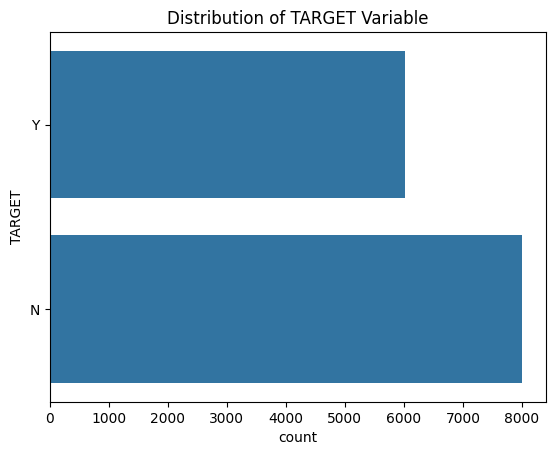

In [7]:
# Plot distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['TARGET'])
plt.title('Distribution of TARGET Variable')
plt.show()


3.4.2 Visualize Numerical Variables

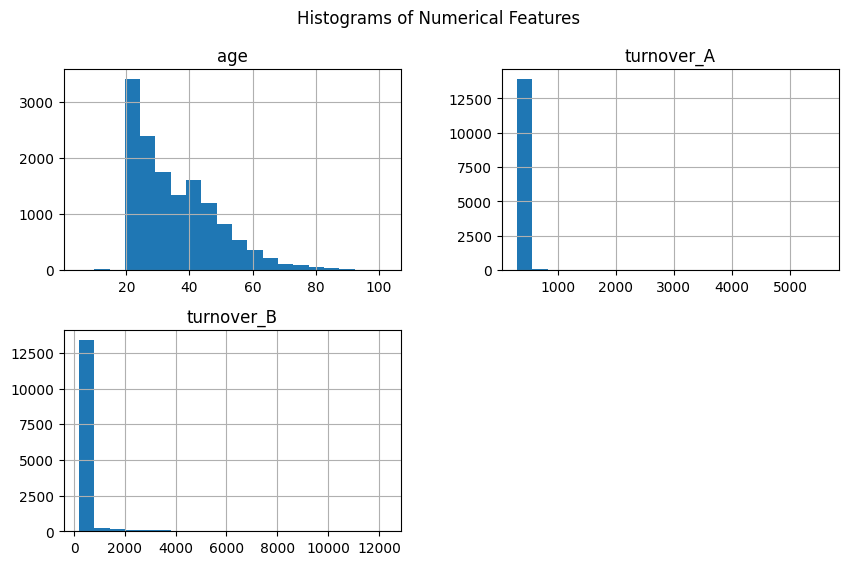

In [8]:
# Plot histograms for numerical features
df[['age', 'turnover_A', 'turnover_B']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Histograms of Numerical Features')
plt.show()

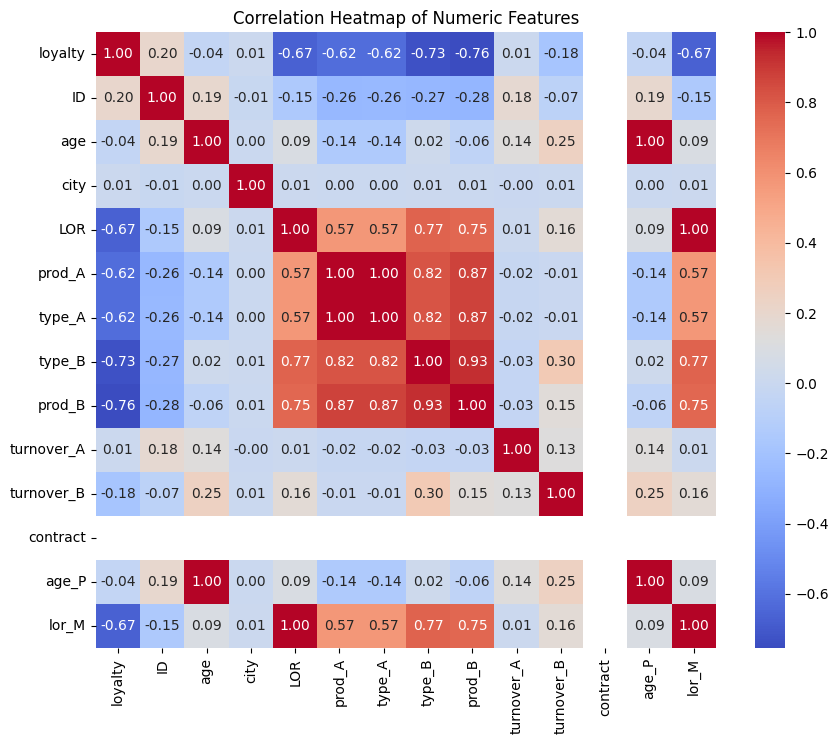

In [9]:


# First, ensure that the dataset contains only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


# Fix this:

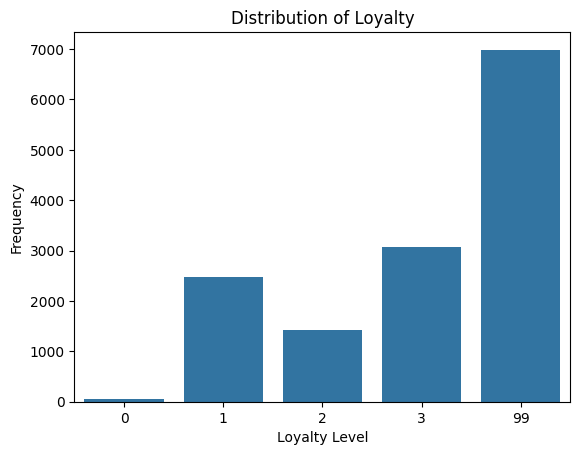

In [10]:
# Plot the distribution of the 'loyalty' column
sns.countplot(x='loyalty', data=df)
plt.title('Distribution of Loyalty')
plt.xlabel('Loyalty Level')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Replace unclassified loyalty values (99) with NaN and fill with mode
df['loyalty'] = df['loyalty'].replace(99, pd.NA)
df['loyalty'].fillna(df['loyalty'].mode()[0], inplace=True)

# Check again for missing values
print(df.isnull().sum())

TARGET        0
loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64


C:\Users\Rogan\AppData\Local\Temp\ipykernel_17360\2792861464.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loyalty'].fillna(df['loyalty'].mode()[0], inplace=True)
C:\Users\Rogan\AppData\Local\Temp\ipykernel_17360\2792861464.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loyalty'].fillna(df['l

In [12]:
df.head(20)

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,3,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,3,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,3,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
5,Y,3,340,24,2,1,1,3,3,1,460.442339,247.467516,2,24,15
6,Y,3,353,57,2,0,0,0,0,0,494.463651,215.976127,2,57,3
7,Y,3,371,32,2,0,0,0,0,0,472.651570,246.208737,2,32,3
8,Y,3,530,28,2,0,0,0,0,0,451.717690,252.719435,2,28,3
9,Y,3,549,30,2,0,0,0,0,0,349.287327,263.293277,2,30,3


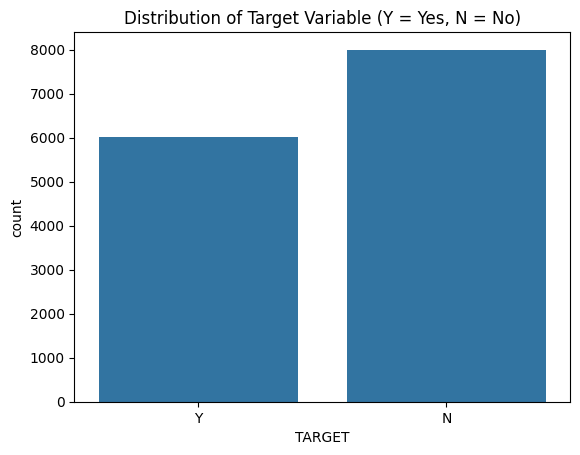

TARGET
N    0.570776
Y    0.429224
Name: proportion, dtype: float64


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(x='TARGET', data=df)
plt.title('Distribution of Target Variable (Y = Yes, N = No)')
plt.show()

# Print the proportion of each class
print(df['TARGET'].value_counts(normalize=True))


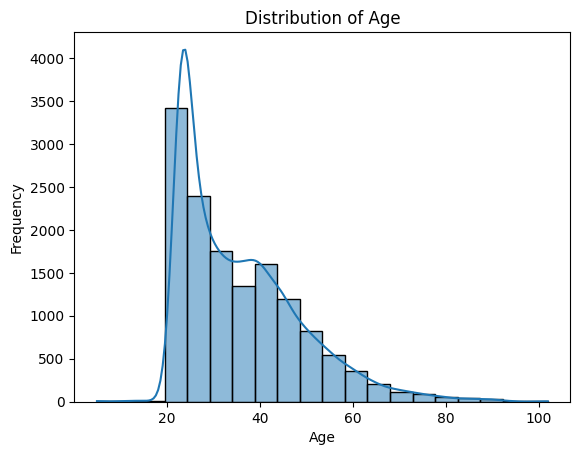

In [14]:
# Plot the distribution of the 'age' column
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


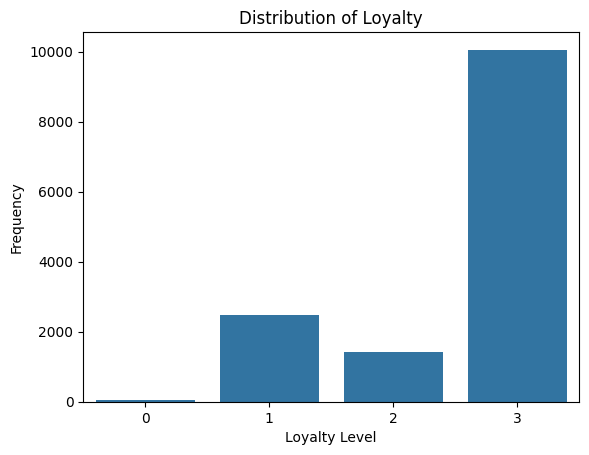

In [15]:
# Plot the distribution of the 'loyalty' column
sns.countplot(x='loyalty', data=df)
plt.title('Distribution of Loyalty')
plt.xlabel('Loyalty Level')
plt.ylabel('Frequency')
plt.show()


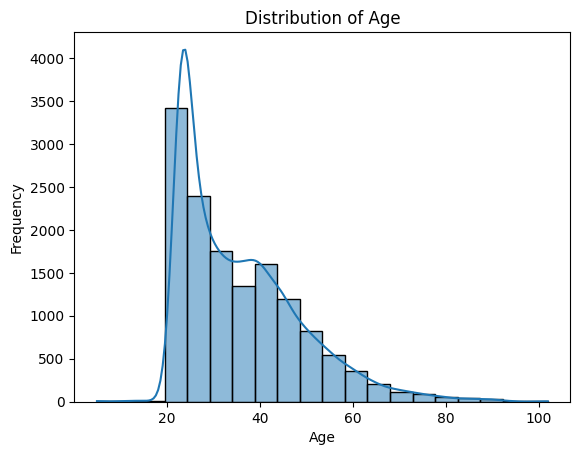

In [16]:
# Plot the distribution of the 'age' column
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


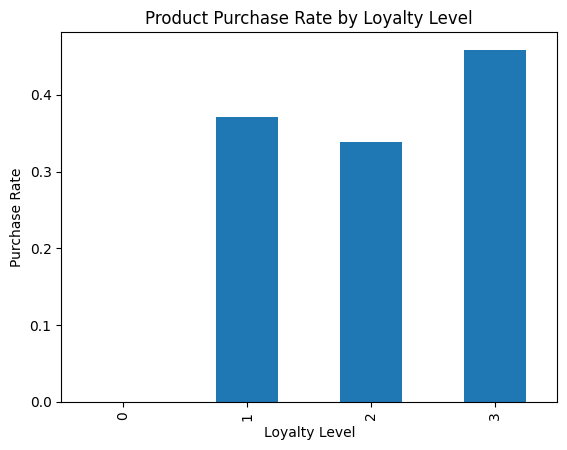

In [17]:
# Group by loyalty and calculate the mean of TARGET (conversion rate)
loyalty_purchase_rate = df.groupby('loyalty')['TARGET'].apply(lambda x: (x == 'Y').mean())

# Bar plot to visualize the relationship
loyalty_purchase_rate.plot(kind='bar')
plt.title('Product Purchase Rate by Loyalty Level')
plt.ylabel('Purchase Rate')
plt.xlabel('Loyalty Level')
plt.show()


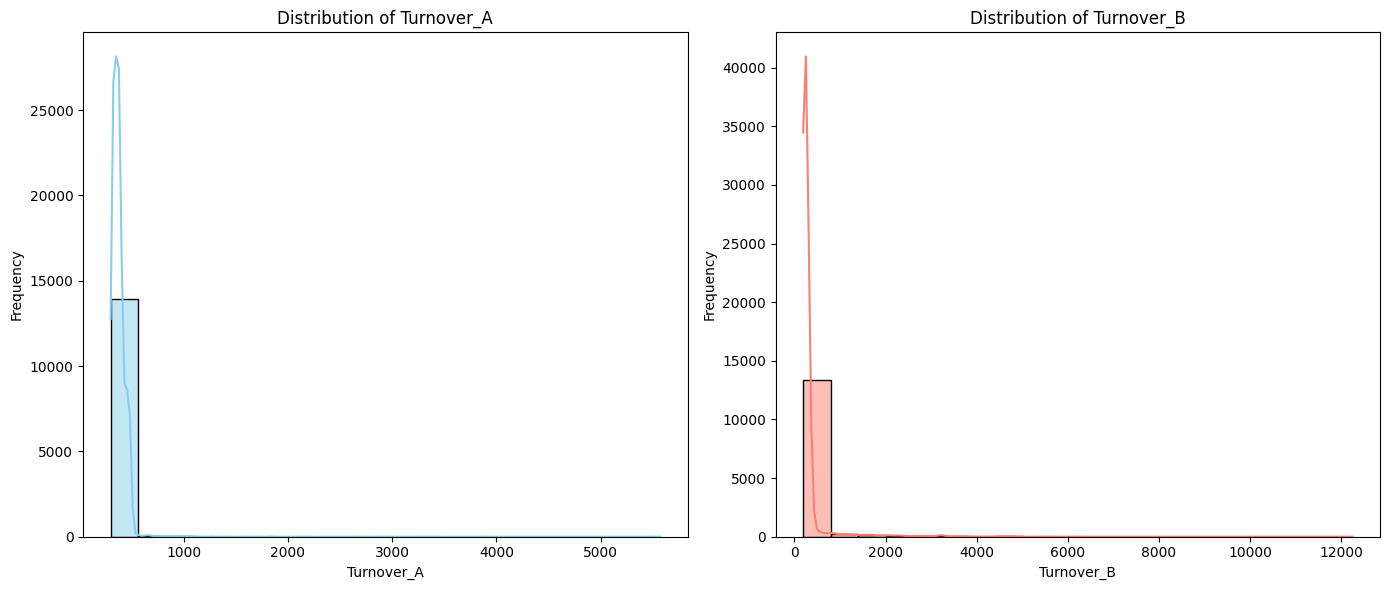

In [18]:
# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution of 'turnover_A' with custom color
sns.histplot(df['turnover_A'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Turnover_A')
axes[0].set_xlabel('Turnover_A')
axes[0].set_ylabel('Frequency')

# Distribution of 'turnover_B' with custom color
sns.histplot(df['turnover_B'], bins=20, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribution of Turnover_B')
axes[1].set_xlabel('Turnover_B')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


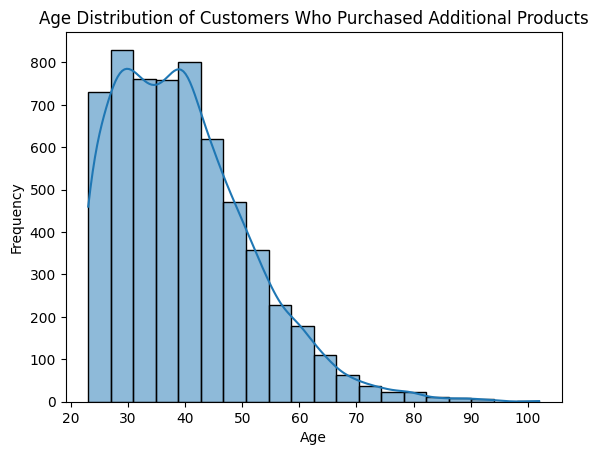

In [19]:
# Plot age distribution for customers who purchased additional products (TARGET = Y)
sns.histplot(df[df['TARGET'] == 'Y']['age'], bins=20, kde=True)
plt.title('Age Distribution of Customers Who Purchased Additional Products')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


c:\Users\Rogan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


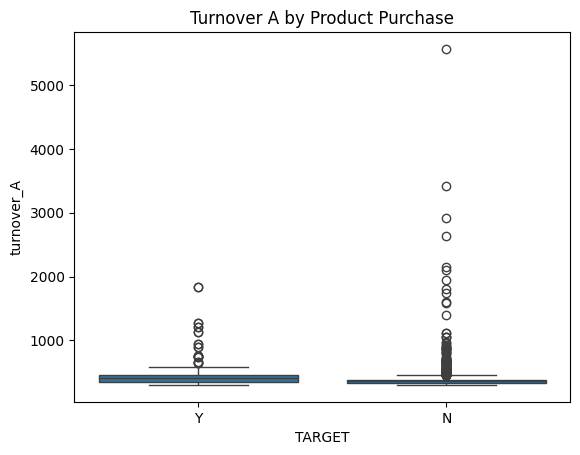

c:\Users\Rogan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


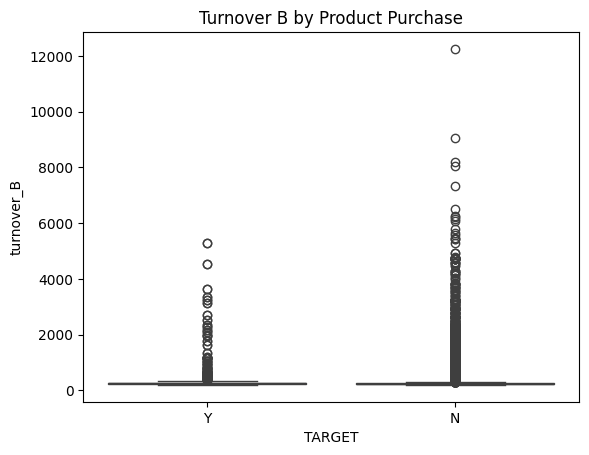

In [20]:
# Boxplot for Turnover A and Product Purchase (TARGET)
sns.boxplot(x='TARGET', y='turnover_A', data=df)
plt.title('Turnover A by Product Purchase')
plt.show()

# Boxplot for Turnover B and Product Purchase (TARGET)
sns.boxplot(x='TARGET', y='turnover_B', data=df)
plt.title('Turnover B by Product Purchase')
plt.show()


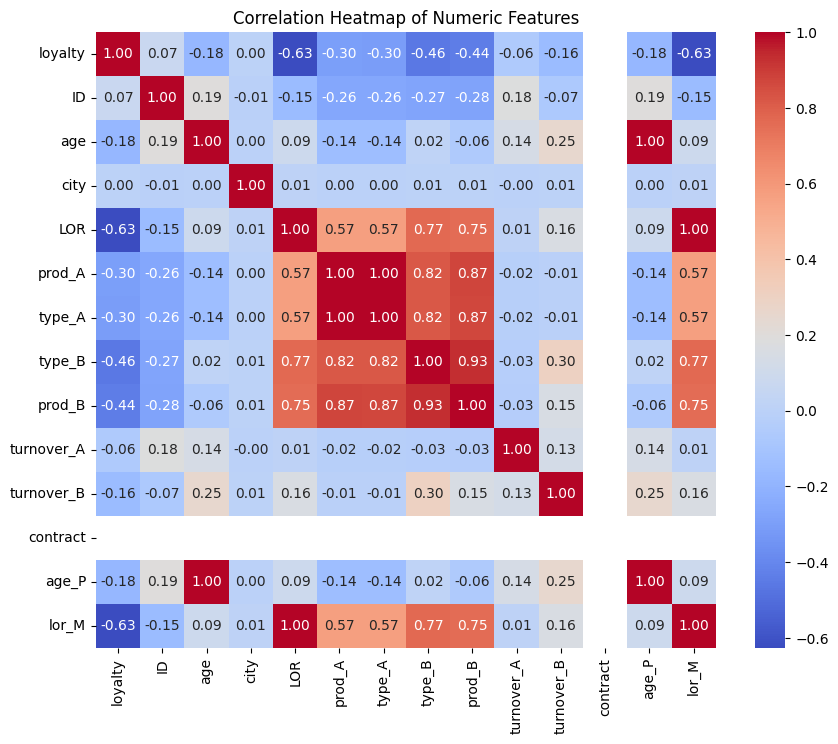

In [21]:
# First, ensure that the dataset contains only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


C:\Users\Rogan\AppData\Local\Temp\ipykernel_17360\2288188312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=df, ax=axs[0], palette='Set1')  # Use a single color since no hue is assigned
c:\Users\Rogan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Rogan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_s

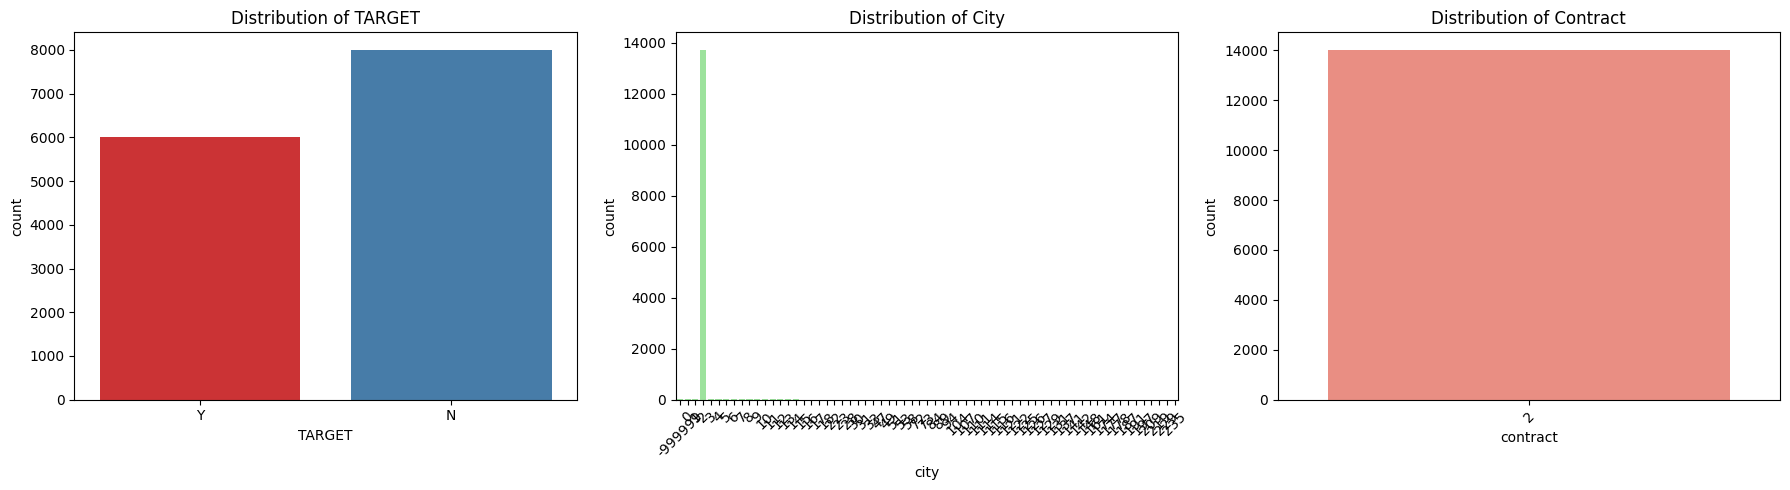

In [22]:

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns for subplots

# Bar plot for TARGET
sns.countplot(x='TARGET', data=df, ax=axs[0], palette='Set1')  # Use a single color since no hue is assigned
axs[0].set_title('Distribution of TARGET')

# Bar plot for city
sns.countplot(x='city', data=df, ax=axs[1], color='lightgreen')  # Use a single color
axs[1].set_title('Distribution of City')
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Bar plot for contract
sns.countplot(x='contract', data=df, ax=axs[2], color='salmon')  # Use a single color
axs[2].set_title('Distribution of Contract')
axs[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()


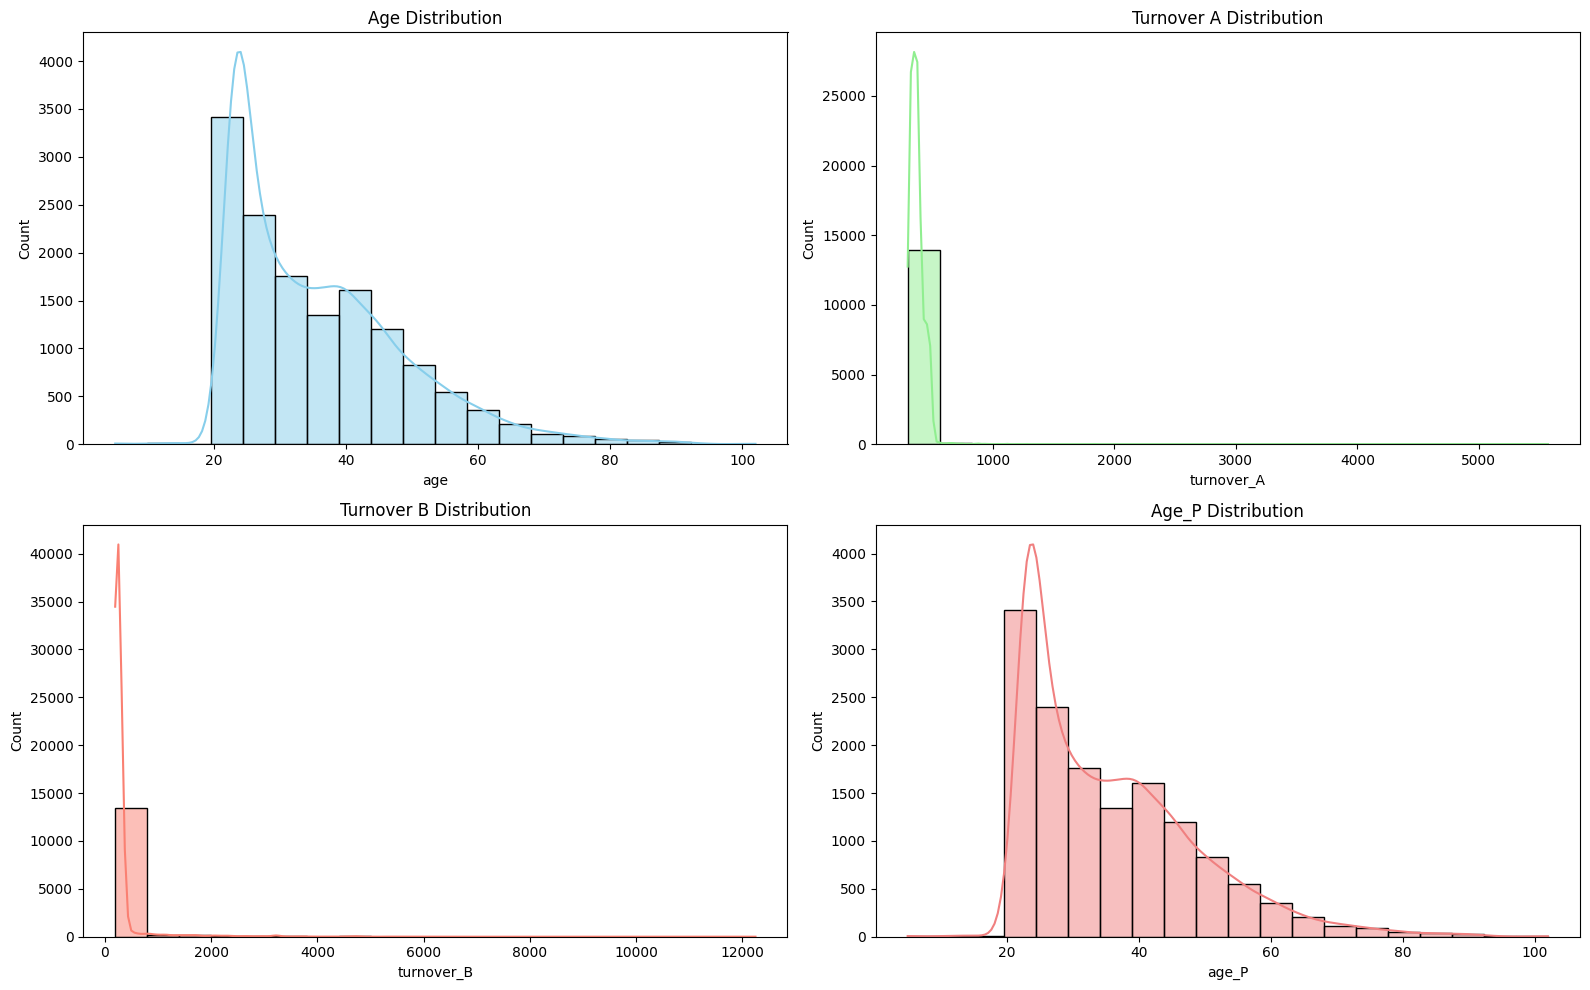

In [23]:
# Create a figure and axes for subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # Adjust the size as needed

# Histogram for age
sns.histplot(df['age'], kde=True, bins=20, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Age Distribution')

# Histogram for turnover_A
sns.histplot(df['turnover_A'], kde=True, bins=20, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Turnover A Distribution')

# Histogram for turnover_B
sns.histplot(df['turnover_B'], kde=True, bins=20, ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('Turnover B Distribution')

# Histogram for age_P
sns.histplot(df['age_P'], kde=True, bins=20, ax=axs[1, 1], color='lightcoral')
axs[1, 1].set_title('Age_P Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


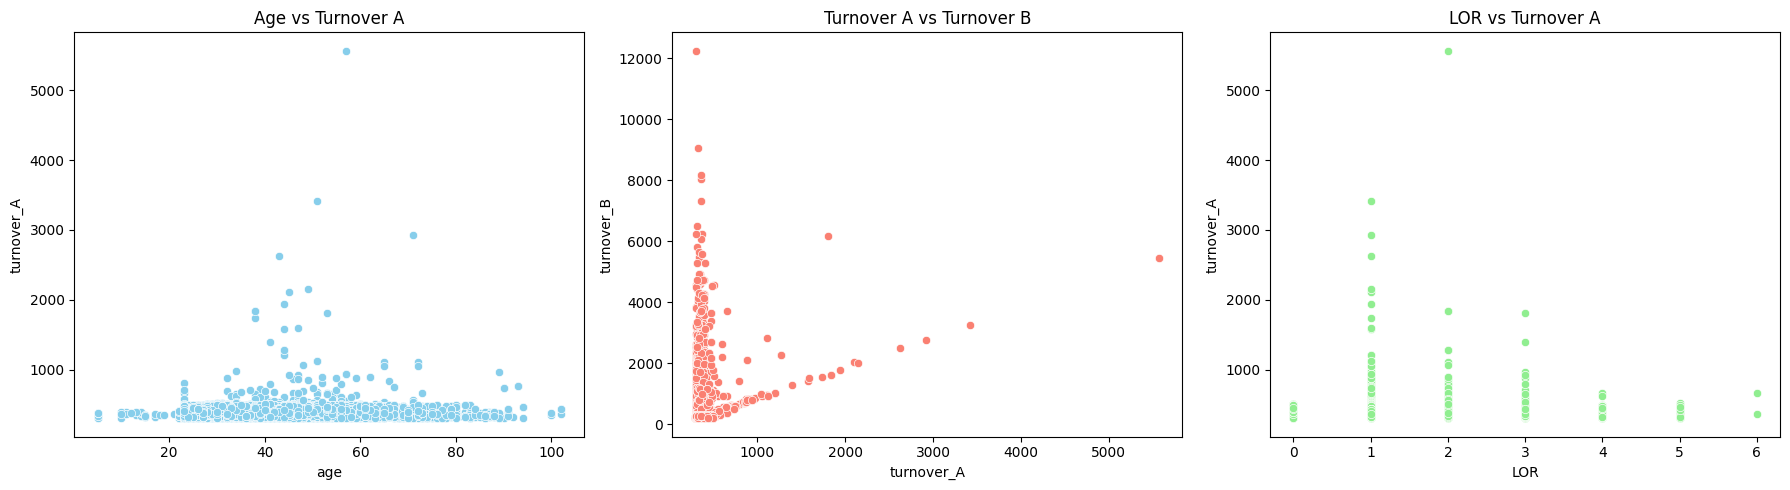

In [24]:

# Create a figure and axes for subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # Adjust the size as needed

# Scatter plot between age and turnover_A
sns.scatterplot(x='age', y='turnover_A', data=df, ax=axs[0], color='skyblue')
axs[0].set_title('Age vs Turnover A')

# Scatter plot between turnover_A and turnover_B
sns.scatterplot(x='turnover_A', y='turnover_B', data=df, ax=axs[1], color='salmon')
axs[1].set_title('Turnover A vs Turnover B')

# Scatter plot between LOR and turnover_A
sns.scatterplot(x='LOR', y='turnover_A', data=df, ax=axs[2], color='lightgreen')
axs[2].set_title('LOR vs Turnover A')

# Adjust layout
plt.tight_layout()
plt.show()


In [25]:
# Preprocessing (Example: Dropping non-informative features)
df.drop(columns=['contract'], inplace=True)


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace with actual data loading method)
# df = pd.read_csv('your_dataset.csv')


# Feature and Target Variables
X = df[['age', 'turnover_A', 'turnover_B']]  # Adjust based on relevant features
y = df['TARGET']  # Assuming TARGET is 0 for non-loyal and 1 for loyal

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the continuous features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Curve
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
[[2011  391]
 [ 668 1135]]

Classification Report:
              precision    recall  f1-score   support

           N       0.75      0.84      0.79      2402
           Y       0.74      0.63      0.68      1803

    accuracy                           0.75      4205
   macro avg       0.75      0.73      0.74      4205
weighted avg       0.75      0.75      0.74      4205



ValueError: y_true takes value in {'N', 'Y'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

Confusion Matrix:
[[2138  264]
 [ 114 1689]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2402
           1       0.86      0.94      0.90      1803

    accuracy                           0.91      4205
   macro avg       0.91      0.91      0.91      4205
weighted avg       0.91      0.91      0.91      4205



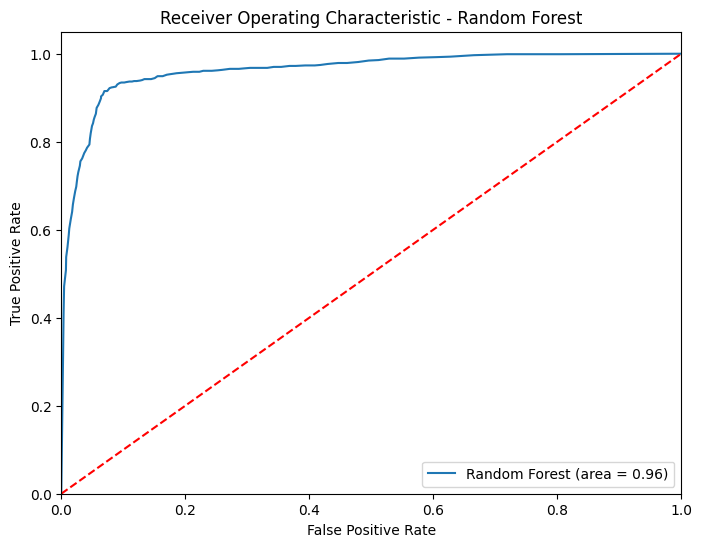

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE  # Import SMOTE for oversampling
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Sample DataFrame (replace with actual data loading method)
# df = pd.read_csv('your_dataset.csv')

# Convert TARGET column ('N' and 'Y') to binary values (0 and 1)
label_encoder = LabelEncoder()
df['TARGET'] = label_encoder.fit_transform(df['TARGET'])  # 'Y' becomes 1, 'N' becomes 0

# Feature and Target Variables
X = df[['age', 'turnover_A', 'turnover_B']]  # Adjust based on relevant features in your dataset
y = df['TARGET']  # Now 0 for non-loyal, 1 for loyal

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to oversample the minority class (loyal customers)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Standardize the continuous features
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res_scaled, y_train_res)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC Curve
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

# Assuming 'df' is your dataset with relevant columns

# Define features and target
X = df.drop(columns=['TARGET'])  # Drop the target column
y = df['TARGET']  # Define target variable

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model 1: Logistic Regression (Manual Selection of Features)
selected_features_manual = ['age', 'turnover_A', 'turnover_B']  # Select manually
X_train_manual = X_train_scaled[:, [X.columns.get_loc(c) for c in selected_features_manual]]
X_test_manual = X_test_scaled[:, [X.columns.get_loc(c) for c in selected_features_manual]]

model_manual = LogisticRegression()
model_manual.fit(X_train_manual, y_train)
print("Manual Feature Selection Logistic Regression Results:")
print(classification_report(y_test, model_manual.predict(X_test_manual)))

### Model 2: Logistic Regression (Decision Tree-based Feature Importance)
# Use a decision tree to identify the most important features
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Get the feature importances and select the most important ones
importances = pd.Series(rf.feature_importances_, index=X.columns)
selected_features_tree = importances.nlargest(5).index.tolist()  # Select top 5 features
X_train_tree = X_train_scaled[:, [X.columns.get_loc(c) for c in selected_features_tree]]
X_test_tree = X_test_scaled[:, [X.columns.get_loc(c) for c in selected_features_tree]]

model_tree = LogisticRegression()
model_tree.fit(X_train_tree, y_train)
print("Decision Tree-based Feature Importance Logistic Regression Results:")
print(classification_report(y_test, model_tree.predict(X_test_tree)))

### Model 3: Logistic Regression (LASSO for Feature Selection)
lasso = LassoCV(cv=5, random_state=42).fit(X_train_scaled, y_train)
model_lasso = SelectFromModel(lasso, prefit=True)
X_train_lasso = model_lasso.transform(X_train_scaled)
X_test_lasso = model_lasso.transform(X_test_scaled)

model_lasso_final = LogisticRegression()
model_lasso_final.fit(X_train_lasso, y_train)
print("LASSO Feature Selection Logistic Regression Results:")
print(classification_report(y_test, model_lasso_final.predict(X_test_lasso)))


Manual Feature Selection Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      2402
           1       0.74      0.63      0.68      1803

    accuracy                           0.75      4205
   macro avg       0.75      0.73      0.74      4205
weighted avg       0.75      0.75      0.74      4205

Decision Tree-based Feature Importance Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2402
           1       0.99      0.87      0.93      1803

    accuracy                           0.94      4205
   macro avg       0.95      0.93      0.94      4205
weighted avg       0.94      0.94      0.94      4205

LASSO Feature Selection Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2402
           1       0.98      0.88      0.93      1803

    acc

In [29]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for the LASSO logistic regression model
cv_scores_lasso = cross_val_score(model_lasso_final, X_train_lasso, y_train, cv=5, scoring='accuracy')

print(f"LASSO Logistic Regression Cross-validation Accuracy: {cv_scores_lasso.mean():.3f} ± {cv_scores_lasso.std():.3f}")


LASSO Logistic Regression Cross-validation Accuracy: 0.942 ± 0.005


In [30]:
# Get the feature names that were selected by LASSO
selected_features = X.columns[model_lasso.get_support()]

# Get the coefficients of the LASSO logistic regression model
lasso_coefficients = model_lasso_final.coef_[0]

# Create a DataFrame to display the feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': lasso_coefficients
})

# Sort the features by their absolute coefficient values
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("LASSO Selected Features and Their Coefficients:")
print(feature_importance[['Feature', 'Coefficient']])


LASSO Selected Features and Their Coefficients:
      Feature  Coefficient
0          ID     8.371228
7  turnover_B    -0.795262
5      prod_B    -0.516662
6  turnover_A     0.418175
8       age_P     0.254141
1         age     0.254141
3      prod_A    -0.194479
9       lor_M     0.106818
2         LOR     0.106818
4      type_B    -0.003658


In [31]:
# Remove the ID feature from the dataset and retrain the LASSO model
X_train_lasso_no_id = X_train.drop(columns=['ID'])
X_test_lasso_no_id = X_test.drop(columns=['ID'])

# Scale the features
X_train_lasso_scaled_no_id = scaler.fit_transform(X_train_lasso_no_id)
X_test_lasso_scaled_no_id = scaler.transform(X_test_lasso_no_id)

# Train the LASSO model again without the ID feature
lasso_no_id = LassoCV(cv=5, random_state=42).fit(X_train_lasso_scaled_no_id, y_train)
model_lasso_no_id = SelectFromModel(lasso_no_id, prefit=True)

X_train_lasso_final_no_id = model_lasso_no_id.transform(X_train_lasso_scaled_no_id)
X_test_lasso_final_no_id = model_lasso_no_id.transform(X_test_lasso_scaled_no_id)

# Train the final LASSO logistic regression model
final_lasso_model = LogisticRegression()
final_lasso_model.fit(X_train_lasso_final_no_id, y_train)

# Evaluate the model
y_pred_lasso_no_id = final_lasso_model.predict(X_test_lasso_final_no_id)
print("Confusion Matrix without ID feature:")
print(confusion_matrix(y_test, y_pred_lasso_no_id))

print("\nClassification Report without ID feature:")
print(classification_report(y_test, y_pred_lasso_no_id))

# Get the final coefficients without the ID feature
selected_features_no_id = X_train_lasso_no_id.columns[model_lasso_no_id.get_support()]
lasso_coefficients_no_id = final_lasso_model.coef_[0]

# Create a DataFrame to display the feature names and their corresponding coefficients
feature_importance_no_id = pd.DataFrame({
    'Feature': selected_features_no_id,
    'Coefficient': lasso_coefficients_no_id
})

# Sort the features by their absolute coefficient values
feature_importance_no_id['Abs_Coefficient'] = feature_importance_no_id['Coefficient'].abs()
feature_importance_no_id = feature_importance_no_id.sort_values(by='Abs_Coefficient', ascending=False)

print("LASSO Selected Features and Their Coefficients (Without ID):")
print(feature_importance_no_id[['Feature', 'Coefficient']])


Confusion Matrix without ID feature:
[[1980  422]
 [ 584 1219]]

Classification Report without ID feature:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      2402
           1       0.74      0.68      0.71      1803

    accuracy                           0.76      4205
   macro avg       0.76      0.75      0.75      4205
weighted avg       0.76      0.76      0.76      4205

LASSO Selected Features and Their Coefficients (Without ID):
      Feature  Coefficient
4  turnover_A     1.214535
5  turnover_B    -0.589276
0         age     0.573320
3      prod_B    -0.376459
2      type_B    -0.285994
1      prod_A    -0.193062
6       lor_M     0.182810
